## [员工离职预测训练](http://www.dcjingsai.com/common/cmpt/员工离职预测训练赛_赛体与数据.html)
这是DC 数据分析新手赛的一道题目, 我会通过逻辑回归的方法，从给定的影响员工离职的因素和员工是否离职的记录，建立一个逻辑回归模型预测有可能离职的员工。

## 数据
数据主要包括影响员工离职的各种因素（工资、出差、工作环境满意度、工作投入度、是否加班、是否升职、工资提升比例等）以及员工是否已经离职的对应记录。 数据分为训练数据和测试数据，分别保存在pfm_train.csv和pfm_test.csv两个文件中。  其中训练数据主要包括1100条记录，31个字段，主要字段说明如下： 
1. Age：员工年龄 
2. Attrition：员工是否已经离职，1表示已经离职，2表示未离职，这是目标预测值； 
3. BusinessTravel：商务差旅频率，Non-Travel表示不出差，Travel_Rarely表示不经常出差，Travel_Frequently表示经常出差； 
4. Department：员工所在部门，Sales表示销售部，Research & Development表示研发部，Human Resources表示人力资源部； 
5. DistanceFromHome：公司跟家庭住址的距离，从1到29，1表示最近，29表示最远； 
6. Education：员工的教育程度，从1到5，5表示教育程度最高； 
7. EducationField：员工所学习的专业领域，Life Sciences表示生命科学，Medical表示医疗，Marketing表示市场营销，Technical Degree表示技术学位，Human Resources表示人力资源，Other表示其他； 
8. EmployeeNumber：员工号码； 
9. EnvironmentSatisfaction：员工对于工作环境的满意程度，从1到4，1的满意程度最低，4的满意程度最高； 
10. Gender：员工性别，Male表示男性，Female表示女性； 
11. JobInvolvement：员工工作投入度，从1到4，1为投入度最低，4为投入度最高； 
12. JobLevel：职业级别，从1到5，1为最低级别，5为最高级别； 
13. JobRole：工作角色：Sales Executive是销售主管，Research Scientist是科学研究员，Laboratory Technician实验室技术员，Manufacturing Director是制造总监，Healthcare Representative是医疗代表，Manager是经理，Sales Representative是销售代表，Research Director是研究总监，Human Resources是人力资源； 
14. JobSatisfaction：工作满意度，从1到4，1代表满意程度最低，4代表满意程度最高； 
15. MaritalStatus：员工婚姻状况，Single代表单身，Married代表已婚，Divorced代表离婚； 
16. MonthlyIncome：员工月收入，范围在1009到19999之间； 
17. NumCompaniesWorked：员工曾经工作过的公司数； 
18. Over18：年龄是否超过18岁； 
19. OverTime：是否加班，Yes表示加班，No表示不加班； 
20. PercentSalaryHike：工资提高的百分比； 
21. PerformanceRating：绩效评估； 
22. RelationshipSatisfaction：关系满意度，从1到4，1表示满意度最低，4表示满意度最高； 
23. StandardHours：标准工时； 
24. StockOptionLevel：股票期权水平； 
25. TotalWorkingYears：总工龄； 
26. TrainingTimesLastYear：上一年的培训时长，从0到6，0表示没有培训，6表示培训时间最长； 
27. WorkLifeBalance：工作与生活平衡程度，从1到4，1表示平衡程度最低，4表示平衡程度最高； 
28. YearsAtCompany：在目前公司工作年数； 
29. YearsInCurrentRole：在目前工作职责的工作年数 
30. YearsSinceLastPromotion：距离上次升职时长 
31. YearsWithCurrManager：跟目前的管理者共事年数； 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

### 查看数据, 第一印象

In [4]:
pd_train = pd.read_csv("data/pfm_train.csv")
pd_test = pd.read_csv("data/pfm_test.csv")

In [5]:
pd_train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,...,3,80,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,...,1,80,1,33,2,1,5,4,1,4
2,34,1,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,...,4,80,0,9,3,3,9,7,0,6
3,39,0,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,...,3,80,1,21,3,3,21,6,11,8
4,28,1,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,...,1,80,2,1,2,3,1,0,0,0


In [6]:
pd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
Age                         1100 non-null int64
Attrition                   1100 non-null int64
BusinessTravel              1100 non-null object
Department                  1100 non-null object
DistanceFromHome            1100 non-null int64
Education                   1100 non-null int64
EducationField              1100 non-null object
EmployeeNumber              1100 non-null int64
EnvironmentSatisfaction     1100 non-null int64
Gender                      1100 non-null object
JobInvolvement              1100 non-null int64
JobLevel                    1100 non-null int64
JobRole                     1100 non-null object
JobSatisfaction             1100 non-null int64
MaritalStatus               1100 non-null object
MonthlyIncome               1100 non-null int64
NumCompaniesWorked          1100 non-null int64
Over18                      1100 non-null object
OverTime              

# 😀
数据很完整, 没有缺失数据  

In [7]:
pd_train.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.999091,0.161818,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,...,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,9.037230,0.368451,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,...,1.095356,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [8]:
pd_test.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,40,Non-Travel,Research & Development,9,4,Other,1449,3,Male,3,...,3,80,2,11,2,4,8,7,0,7
1,53,Travel_Rarely,Research & Development,7,2,Medical,1201,4,Female,3,...,2,80,1,26,6,3,7,7,4,7
2,42,Travel_Rarely,Research & Development,2,4,Other,477,1,Male,2,...,2,80,0,14,6,3,1,0,0,0
3,34,Travel_Frequently,Human Resources,11,3,Life Sciences,1289,3,Male,2,...,4,80,2,14,5,4,10,9,1,8
4,32,Travel_Rarely,Research & Development,1,1,Life Sciences,134,4,Male,3,...,4,80,0,1,2,3,1,0,0,0


In [10]:
pd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 30 columns):
Age                         350 non-null int64
BusinessTravel              350 non-null object
Department                  350 non-null object
DistanceFromHome            350 non-null int64
Education                   350 non-null int64
EducationField              350 non-null object
EmployeeNumber              350 non-null int64
EnvironmentSatisfaction     350 non-null int64
Gender                      350 non-null object
JobInvolvement              350 non-null int64
JobLevel                    350 non-null int64
JobRole                     350 non-null object
JobSatisfaction             350 non-null int64
MaritalStatus               350 non-null object
MonthlyIncome               350 non-null int64
NumCompaniesWorked          350 non-null int64
Over18                      350 non-null object
OverTime                    350 non-null object
PercentSalaryHike           350 non-null 

## 数据清洗
>寻找跟离职相关的数据, 并规范化数据, 把object类型的数据转化成数值型

### Age

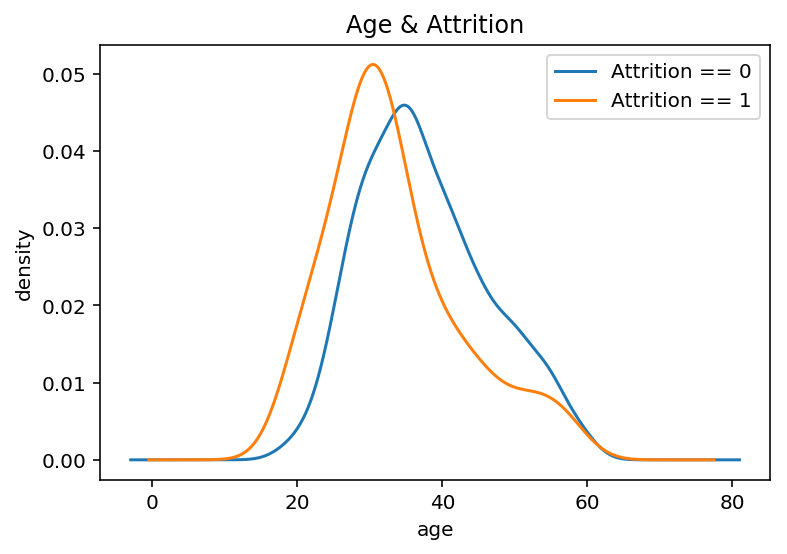

In [26]:
pd_train.Age[pd_train.Attrition == 0].plot(kind="kde")
pd_train.Age[pd_train.Attrition == 1].plot(kind="kde")
plt.xlabel("age")
plt.ylabel("density")
plt.legend(["Attrition == 0", "Attrition == 1"])
plt.title("Age & Attrition")
plt.show()

嗯, 年龄和离职有一定关联性

### Business Travel